In [2]:
import numpy as np
import pandas as pd

from my_framework.modeles.SIRModel import SIRModel
from my_framework.modeles.SEIRModel import SEIRModel
from my_framework.etl import get_dataset, get_idf_df
from my_framework.plot import plot_simple_sir, plot_triple_sir, plotseird

# Country

## Data

In [22]:
country = "China"

In [23]:
df_data, pop_size = get_dataset(country)
print("Population : {}".format(pop_size))
df_data.tail()

Population : 1433783691


,confirm,recover,death
6/13/20,84286,79475,4638
6/14/20,84335,79482,4638
6/15/20,84378,79489,4638
6/16/20,84422,79493,4638
6/17/20,84458,79510,4638


## SIR

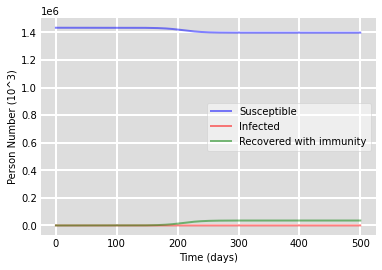

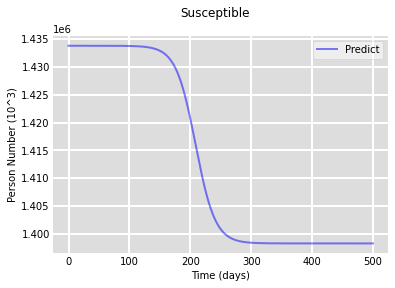

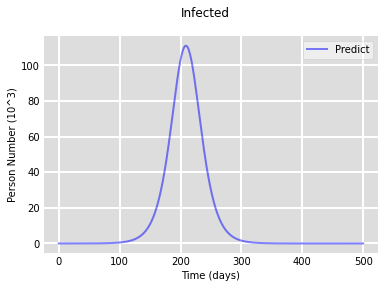

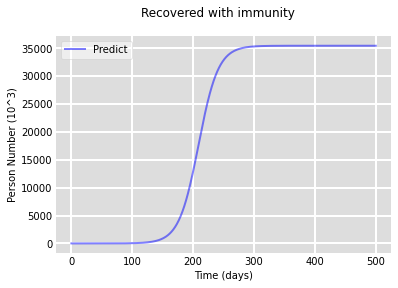

5.015350013439631 4.953051654558987


In [5]:
nd_day = 500
t = np.linspace(0, nd_day, nd_day)

model_sir = SIRModel()

model_sir.fit(pop_size, df_data["confirm"])
S, I, R = model_sir.predict(t, pop_size, 1)
plot_simple_sir(t, S, I, R)
plot_triple_sir(t, S, I, R)
print(model_sir.params["beta"], model_sir.params["gamma"])                 

## SEIR

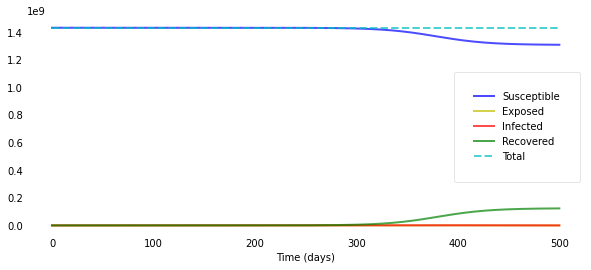

In [7]:
nb_day = 500
t = np.linspace(0, nb_day, nb_day)

seir_model = SEIRModel()
seir_model.fit(pop_size, df_data["confirm"])

S, E, I, R = seir_model.predict(t, pop_size, 1)
plotseird(t, S, E, I, R )

# Comparaison sur des critères

In [4]:
list_country = ["France", "Brazil", "Egypt", "US", "Japan", "Norway"]
df_idh = get_idf_df(list_country, ["Country","IDH"])
df_idh = get_info_pop_df(list_country, ["PopDensity", "pourcentage_homme", "PopTotal"])

for country in list_country:
    df_data, _ = get_dataset(country)
    
    print("Country : {}, Population : {}, IDH : {}".format(country, pop_size, 
                                                           float(df_idh.loc[df_idh["Country"]==country, "IDH"].values[0]) ))
 

Country : France, Population : 65129731, IDH : 0.891
Country : Brazil, Population : 211049518, IDH : 0.761
Country : Egypt, Population : 100388076, IDH : 0.7
Country : US, Population : 329064917, IDH : 0.92
Country : Japan, Population : 126860299, IDH : 0.915
Country : Norway, Population : 5378859, IDH : 0.954


In [40]:



get_info_pop_df(list_country, ["PopDensity", "pourcentage_homme", "PopTotal"])
    
    

,PopDensity,pourcentage_homme,PopTotal
93672,118.946,0.938083,65129.731
30795,25.251,0.966611,211049.519
80390,100.847,1.021285,100388.076
264290,35.974,0.979473,329064.917
123901,347.987,0.954403,126860.299
188090,14.726,1.020573,5378.859


In [20]:
df_population_info = pd.read_csv('/home/covid/dataset/global/WPP2019_TotalPopulationBySex.csv', sep = ',')
df_population_info["pourcentage_homme"] = df_population_info["PopMale"] / df_population_info["PopFemale"]
# df_population_info.loc[df_population_info["Time"]==2019, ["PopDensity", "pourcentage_homme", "PopTotal"]]
df_population_info

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,pourcentage_homme
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874,1.122197
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009,1.115875
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156,1.109770
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315,1.103887
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486,1.098242
...,...,...,...,...,...,...,...,...,...,...,...
280927,716,Zimbabwe,207,Lower 95 PI,2080,2080.5,10576.533,11255.983,21836.893,56.448,0.939637
280928,716,Zimbabwe,207,Lower 95 PI,2085,2085.5,10293.349,11050.875,21355.988,55.205,0.931451
280929,716,Zimbabwe,207,Lower 95 PI,2090,2090.5,9920.336,10767.709,20689.956,53.483,0.921304
280930,716,Zimbabwe,207,Lower 95 PI,2095,2095.5,9503.711,10412.184,19892.080,51.421,0.912749


In [13]:
# Critère d'aggravation de la propagation / mortalité ...

# Temperature Moyenne
# Moyen age / Age Median
# IDH = moyenne PIB / Esperance vie / Instructrion
# Densité de population (on l'a)
# Repartition Homme Femme (on l'a)


In [ ]:
# Critère de Jugement de la gravité de la maladie
# Pic du nombre d'infecté / la population totale
# Nombre total d'infecté / Population total

# date de confinement
# Quantité de masque



In [37]:
df_population_info = pd.read_csv('/home/covid/dataset/global/WPP2019_TotalPopulationBySex.csv', sep = ',')
df_population_info["pourcentage_homme"] = df_population_info["PopMale"] / df_population_info["PopFemale"]
# df_tmp = df_population_info.loc[(df_population_info["Time"]==2019 & df_population_info["Location"]==country)]
df_tmp = df_population_info.loc[(df_population_info["Time"]==2019) & (df_population_info["Location"]==)]
df_tmp

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,pourcentage_homme
69,4,Afghanistan,2,Medium,2019,2019.5,19529.727,18512.03,38041.757,58.269,1.054975


In [33]:
df_population_info


,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,pourcentage_homme
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874,1.122197
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009,1.115875
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156,1.109770
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315,1.103887
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486,1.098242
...,...,...,...,...,...,...,...,...,...,...,...
280927,716,Zimbabwe,207,Lower 95 PI,2080,2080.5,10576.533,11255.983,21836.893,56.448,0.939637
280928,716,Zimbabwe,207,Lower 95 PI,2085,2085.5,10293.349,11050.875,21355.988,55.205,0.931451
280929,716,Zimbabwe,207,Lower 95 PI,2090,2090.5,9920.336,10767.709,20689.956,53.483,0.921304
280930,716,Zimbabwe,207,Lower 95 PI,2095,2095.5,9503.711,10412.184,19892.080,51.421,0.912749
